In [21]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras import models
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import cv2
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import warnings

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
!unzip '/content/drive/MyDrive/Digital Naturalist Dataset.zip' -d '/content/drive/MyDrive/Digital Naturalist Dataset/'

Archive:  /content/drive/MyDrive/Digital Naturalist Dataset.zip
   creating: /content/drive/MyDrive/Digital Naturalist Dataset/Digital Naturalist Dataset/
   creating: /content/drive/MyDrive/Digital Naturalist Dataset/Digital Naturalist Dataset/Bird/
   creating: /content/drive/MyDrive/Digital Naturalist Dataset/Digital Naturalist Dataset/Bird/Great Indian Bustard Bird/
  inflating: /content/drive/MyDrive/Digital Naturalist Dataset/Digital Naturalist Dataset/Bird/Great Indian Bustard Bird/download (1).jpg  
  inflating: /content/drive/MyDrive/Digital Naturalist Dataset/Digital Naturalist Dataset/Bird/Great Indian Bustard Bird/download (10).jpg  
  inflating: /content/drive/MyDrive/Digital Naturalist Dataset/Digital Naturalist Dataset/Bird/Great Indian Bustard Bird/download (11).jpg  
  inflating: /content/drive/MyDrive/Digital Naturalist Dataset/Digital Naturalist Dataset/Bird/Great Indian Bustard Bird/download (2).jpg  
  inflating: /content/drive/MyDrive/Digital Naturalist Dataset/Di

In [42]:
my_data_dir = '/content/drive/MyDrive/Digital Naturalist Dataset/Digital Naturalist Dataset/Flower/'

In [43]:
X=[]
l=[]
img_dim=150
Corpse_dir='/content/drive/MyDrive/Digital Naturalist Dataset/Digital Naturalist Dataset/Flower/Corpse Flower/'
Lady_dir='/content/drive/MyDrive/Digital Naturalist Dataset/Digital Naturalist Dataset/Flower/Lady Slipper Orchid Flower/'

In [44]:
def assign_label(img,flower_type):
    return flower_type
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (img_dim,img_dim))
        
        X.append(np.array(img))
        l.append(str(label))

In [45]:
make_train_data('Corpse Flower',Corpse_dir)
make_train_data('Lady Slipper Orchid Flower',Lady_dir)

100%|██████████| 24/24 [00:00<00:00, 326.22it/s]


In [47]:
le=LabelEncoder()
y=le.fit_transform(l)
y=to_categorical(y,5)
X=np.array(X)
X=X/255

In [48]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=32)

In [49]:
augment = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False, 
        zca_whitening=False, 
        rotation_range=10, 
        zoom_range = 0.1, 
        width_shift_range=0.2, 
        height_shift_range=0.2, 
        horizontal_flip=True, 
        vertical_flip=False) 


augment.fit(x_train)

In [50]:
model = models.Sequential()
model.add(layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.Conv2D(filters =128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Activation('relu'))
model.add(layers.Dense(5, activation = "softmax"))

In [51]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [52]:
History = model.fit(augment.flow(x_train,y_train, batch_size=128),
                              epochs = 50, validation_data = (x_test,y_test))

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 1.5583 - accuracy: 0.5000 - val_loss: 1.9858 - val_accuracy: 0.2667
Epoch 2/50
1/1 [==============================] - 2s 2s/step - loss: 1.0303 - accuracy: 0.6176 - val_loss: 0.7864 - val_accuracy: 0.7333
Epoch 3/50
1/1 [==============================] - 2s 2s/step - loss: 1.5165 - accuracy: 0.3824 - val_loss: 0.7899 - val_accuracy: 0.7333
Epoch 4/50
1/1 [==============================] - 2s 2s/step - loss: 0.9214 - accuracy: 0.3824 - val_loss: 0.9532 - val_accuracy: 0.3333
Epoch 5/50
1/1 [==============================] - 2s 2s/step - loss: 0.9140 - accuracy: 0.6471 - val_loss: 0.9531 - val_accuracy: 0.2667
Epoch 6/50
1/1 [==============================] - 2s 2s/step - loss: 0.8077 - accuracy: 0.6176 - val_loss: 1.0098 - val_accuracy: 0.2667
Epoch 7/50
1/1 [==============================] - 2s 2s/step - loss: 0.7061 - accuracy: 0.6176 - val_loss: 1.1459 - val_accuracy: 0.2667
Epoch 8/50
1/1 [=========================

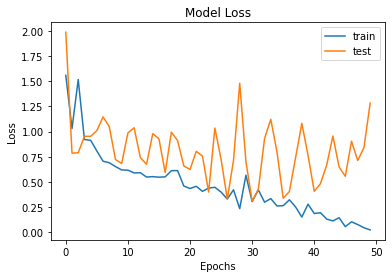

In [53]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [54]:
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [55]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

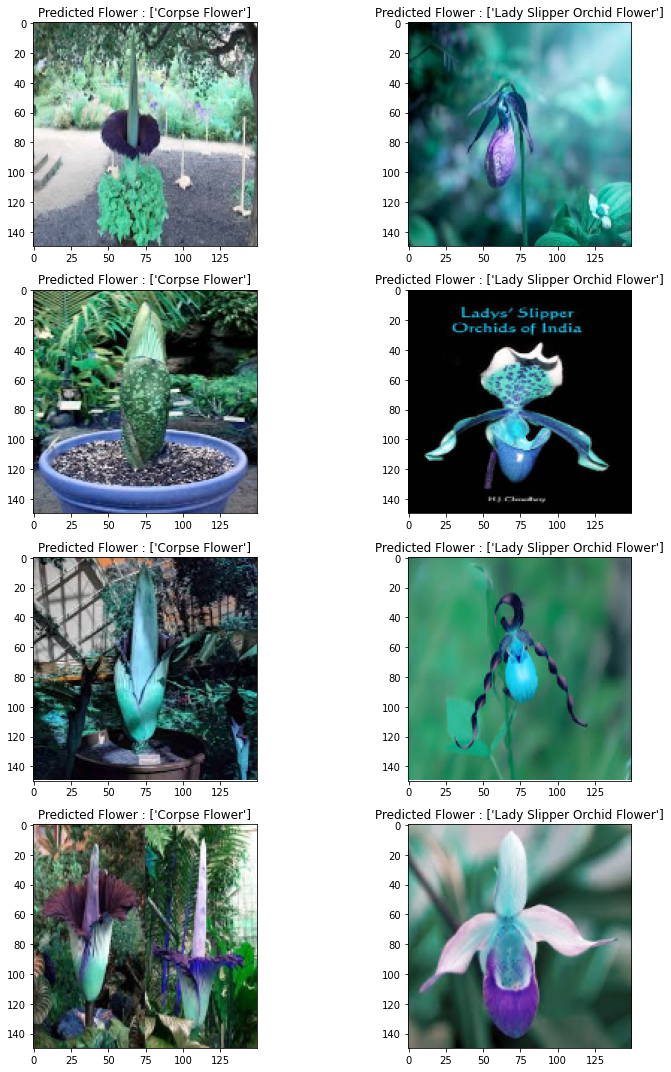

In [56]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[prop_class[count]]])))
        plt.tight_layout()
        count+=1